In [1]:
import os
os.environ['WANDB_NOTEBOOK_NAME'] = '3_neural_net.ipynb'
import joblib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pytorch_lightning as pl
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
import timm
from timm.optim import NovoGrad
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import wandb

from sklearn.pipeline import make_pipeline, make_union
from src.constants import TARGETS
from src.nn_utils import RandomData, LitModel
seed = 457860
pl.seed_everything(seed)

Global seed set to 457860


457860

In [4]:
tr_index, vl_index = pd.read_csv("data/tr_index_smallv01.csv"), pd.read_csv("data/vl_index_smallv01.csv")
tr_index.shape, vl_index.shape

((1480189, 7), (55789, 7))

In [43]:
X_tr, X_vl = np.load("data/X_tr_v201_f1.npy"), np.load("data/X_vl_v201_f1.npy")

In [44]:
X_tr.shape, X_vl.shape

((1480189, 639), (55789, 639))

In [45]:
scaler = MinMaxScaler((0, 1), clip=True)
scaler.fit(X_tr)
joblib.dump(scaler, "artifacts/min_max_scaler_v2.pkl")

['artifacts/min_max_scaler_v2.pkl']

In [46]:
tr_labels = tr_index[TARGETS].values
vl_labels = vl_index[TARGETS].values
print(tr_labels.shape, vl_labels.shape)

(1480189, 4) (55789, 4)


In [47]:
#np.where(pd.DataFrame(np.load("data/X_vl1_v1.npy")).isnull().sum(axis=0) < 15000)

In [48]:
BATCH_SIZE = 4096
NUM_WORKERS = 8
IN_F = X_tr.shape[1]
D = 300
P = 0.1
LR = 0.01
WD = 0.001
GRAD_AVG = True
MAX_EPOCHS = 75
STEPS = [20, 40, 60]
GAMMA = 0.2
version = 'v2'

In [49]:
tr_ds = RandomData(X_tr, tr_labels, scaler)
tr_dl = DataLoader(tr_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
vl_ds = RandomData(X_vl, vl_labels, scaler)
vl_dl = DataLoader(vl_ds, batch_size=BATCH_SIZE*2, drop_last=False, shuffle=False, num_workers=NUM_WORKERS)

In [50]:
model = LitModel(IN_F, 4, D, P, lr=LR, wd=WD, grad_avg=GRAD_AVG, steps=STEPS, gamma=GAMMA)

callbacks = [pl.callbacks.ModelCheckpoint(monitor='val/loss', save_top_k=2, mode='min', dirpath=f'data/checkpoints/v201/{D}_{seed}_{version}', auto_insert_metric_name=False,
                                         filename="epoch={epoch}-val_loss={val/loss:.4f}")]
logger = pl.loggers.wandb.WandbLogger(project='mlb', name=f'nnflat_201_{str(D)}_{seed}', tags=['flat nn 201', f'{D}'], id=wandb.util.generate_id())
logger.log_hyperparams({'D': D, 'P': P, 'LR': LR, 'WD': WD, 'GRAD_AVG': GRAD_AVG, 'BATCH_SIZE': BATCH_SIZE})
trainer = pl.Trainer(gpus=[1], max_epochs=MAX_EPOCHS, logger=logger, callbacks=callbacks, stochastic_weight_avg=False, deterministic=True)

/home/mohsin_okcredit_in/anaconda3/envs/setienv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Checkpoint directory data/checkpoints/v201/300_457860_v2 exists and is not empty.
  warnings.warn(*args, **kwargs)
wandb: wandb version 0.11.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [51]:
trainer.fit(model, tr_dl, vl_dl)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name      | Type    | Params
--------------------------------------
0 | model     | FCModel | 375 K 
1 | criterion | L1Loss  | 0     
--------------------------------------
375 K     Trainable params
0         Non-trainable params
375 K     Total params
1.503     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 457860


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [52]:
from pathlib import Path
top_model_files = Path(f"data/checkpoints/v201/{D}_{seed}_{version}").glob("*.ckpt")
top_model_files = sorted(top_model_files, key=lambda x: float(x.stem.split("=")[-1]))[:2]

preds_nn = []
for file in top_model_files:
    model.load_state_dict(torch.load(str(file))["state_dict"], strict=False)
    model.freeze()
    preds = trainer.test(model, vl_dl)[0]['output']
    preds_nn.append(preds)

preds_nn = np.mean(preds_nn, 0)
mae(preds_nn, vl_labels)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'output': array([[2.3204213e-01, 9.0887284e-01, 9.8255858e-02, 2.1975361e-01],
       [1.9112625e-03, 1.1084294e+00, 5.4731863e-03, 4.0589571e-01],
       [1.2408833e-03, 4.5936671e-01, 1.2440805e-03, 1.6489623e-01],
       ...,
       [4.8512549e-04, 1.5509391e-01, 3.1935012e-03, 1.7360951e-01],
       [6.3289335e-04, 8.6209863e-01, 8.9098659e-04, 3.2498229e-01],
       [2.3692341e-04, 1.3033460e-01, 2.2362745e-03, 1.3307226e-01]],
      dtype=float32)}
--------------------------------------------------------------------------------


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'output': array([[2.4958378e-01, 9.9041504e-01, 1.0974679e-01, 2.4122980e-01],
       [3.1106821e-03, 1.0500205e+00, 6.0168584e-03, 3.3550215e-01],
       [2.2473196e-03, 4.5418718e-01, 1.3751998e-03, 1.1226754e-01],
       ...,
       [1.3449941e-03, 1.6751973e-01, 3.1226291e-03, 1.5208437e-01],
       [1.9798528e-03, 9.6895140e-01, 8.9919247e-04, 2.8882831e-01],
       [9.7318343e-04, 1.3941176e-01, 2.0467755e-03, 1.1369603e-01]],
      dtype=float32)}
--------------------------------------------------------------------------------


1.1013761463338883

In [53]:
top_model_files

[PosixPath('data/checkpoints/v201/300_457860_v2/epoch=45-val_loss=1.1023.ckpt'),
 PosixPath('data/checkpoints/v201/300_457860_v2/epoch=35-val_loss=1.1030.ckpt')]

In [54]:
wandb.finish()

train/loss_step,0.99077
epoch,74
trainer/global_step,27150
_runtime,643
_timestamp,1627673624
_step,694
train/loss_epoch,1.05137
val/loss,1.108


train/loss_step,▆▇█▅▄▆▃▄▄▂▄▃▅▂▇▁▃▃▅▃▄▅▃▅▃▃▂▃▅▆▁▆▁▃▁▃▅▅▃▃
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇████
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇████
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇████
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/loss_epoch,█▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/loss,█▇▄▅▂▄▂▂▄▁▂▁▁▂▂▂▂▂▃▁▂▂▂▂▁▂▁▁▁▂▁▁▁▁▂▂▂▁▁▁


In [36]:
predst1_lgb = np.load("data/lgb_t1_logv401_skip10_1.npy")
predst2_lgb = np.load("data/lgb_t2_logv401_skip10_1.npy")
predst3_lgb = np.load("data/lgb_t3_logv401_skip10_1.npy")
predst4_lgb = np.load("data/lgb_t4_logv401_skip10_1.npy")

In [37]:
preds_lgb = np.vstack((predst1_lgb, predst2_lgb, predst3_lgb, predst4_lgb)).T


In [38]:
tmp = pd.read_csv("data/seasons_formatted.csv")
tmp.date.dtype

dtype('int64')

In [39]:
targets = vl_labels

In [57]:
mae(targets, preds_nn), mae(targets, preds_lgb), mae(targets, preds_lgb*0.7 + preds_nn*0.3)

(1.1013761463338883, 1.1055802542299116, 1.0953811913024665)

In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns

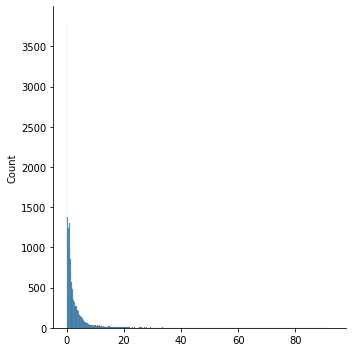

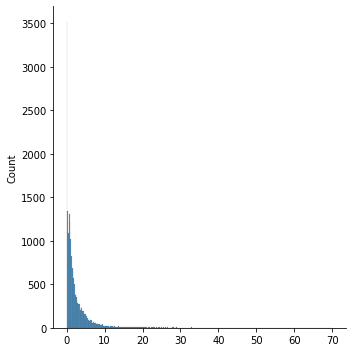

In [21]:
sns.displot(preds_nn[:, 1])
sns.displot(preds_lgb[:, 1])

In [22]:
preds_nn[0], preds_lgb[0]

(array([0.03394287, 7.721491  , 0.03847341, 1.447876  ], dtype=float32),
 array([0.02419203, 8.02964874, 0.02313256, 1.66414533]))